In [1]:
%matplotlib inline

from pymoc import MOC
import healpy
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pymoc
from moc_plotting import plot_moc

In [2]:
ukidds = MOC(filename='/home/calum/Documents/Mphys_data/calibration/las-DR10-lores.fits')
sdss = MOC(filename='/home/calum/Documents/Mphys_data/calibration/sdssDR9-hires.fits')
wise = MOC(filename='/home/calum/Documents/Mphys_data/calibration/wise-coverage.fits')

In [3]:
galex = MOC(filename='/home/calum/Documents/Mphys_data/match_catalogs/galex_moc.fits')
low_galex = MOC(filename='/home/calum/Documents/Mphys_data/match_catalogs/lowres_galex_moc.fits')

In [4]:
ukidss_calum = MOC(filename='/home/calum/Documents/Mphys_data/match_catalogs/ukidss_moc.fits')

In [5]:
ukidds.area_sq_deg, sdss.area_sq_deg, wise.area_sq_deg, galex.area_sq_deg, low_galex.area_sq_deg, ukidss_calum.area_sq_deg

(3955.381126468927,
 14806.998805809493,
 41218.57971638284,
 28775.812096298763,
 35975.482808331464,
 3823.0874656425167)

In [6]:
intersect_ukidds_sdss = ukidds.intersection(sdss)

In [7]:
intersect_ukidds_sdss.area_sq_deg

3897.8468913915403

In [8]:
intersect_ukidds_sdss_wise = intersect_ukidds_sdss.intersection(wise)

In [9]:
intersect_ukidds_sdss_wise.area_sq_deg

3897.7846000663108

In [12]:
intersect_ukidds_sdss_wise_galex = intersect_ukidds_sdss_wise.intersection(galex)

In [13]:
intersect_ukidds_sdss_wise_galex.area_sq_deg

3652.960020965572

In [15]:
print('Anticipated cross over:', intersect_ukidds_sdss_wise_galex.area_sq_deg/sdss.area_sq_deg )

Anticipated cross over: 0.24670495816696772


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


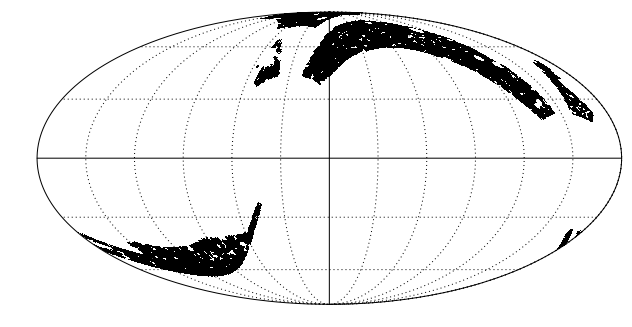

In [14]:
plot_moc(intersect_ukidds_sdss_wise_galex, projection='moll',color='black')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


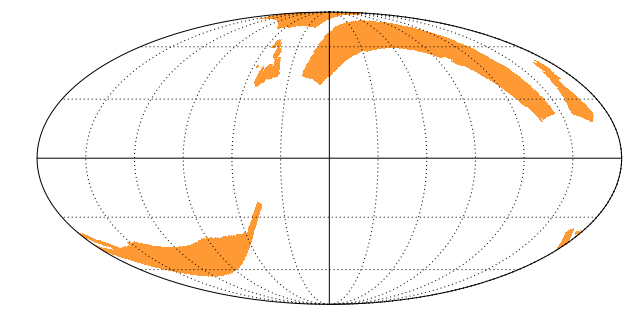

In [11]:
plot_moc(ukidds, projection='moll',color='yellow')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


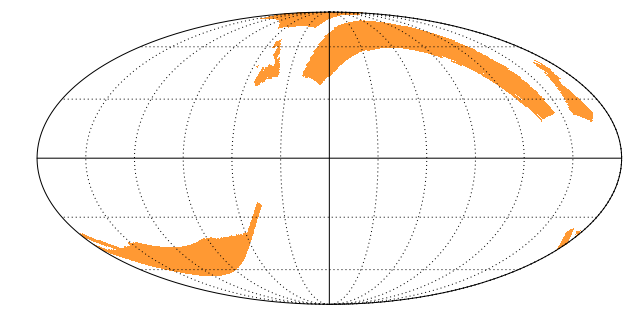

In [18]:
plot_moc(ukidss_calum, projection='moll',color='yellow')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


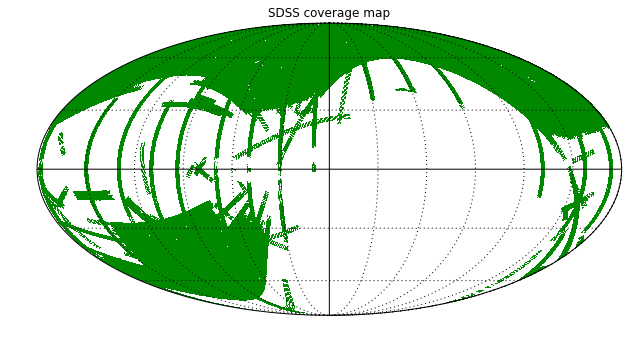

In [19]:
plot_moc(sdss, projection='moll', color='green', title='SDSS coverage map')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


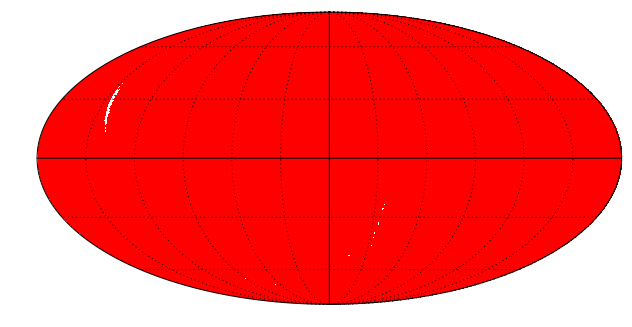

In [20]:
plot_moc(wise, projection='moll', color='red')
plt.savefig('wise_covmap.png')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


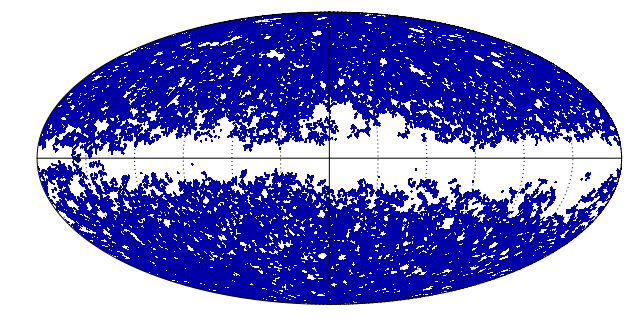

In [21]:
plot_moc(galex, projection='moll', color='blue')

In [1]:
plot_moc(low_galex, projection='moll', color='blue')

NameError: name 'plot_moc' is not defined

In [1]:
ukidds.order, sdss.order, galex.order, wise.order, low_galex.order

NameError: name 'ukidds' is not defined